# Data Analysis Project - Social Media and Mental Health

## 1. Data Loading and Understanding the Dataset

**Reference: Solution-Data-in-out.ipynb**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt # Import necessary libraries

from google.colab import drive
drive.mount('/gdrive') # connect to Google Drive
sm = pd.read_csv('/gdrive/My Drive/Colab Notebooks/smmh.csv') # import dataset

Mounted at /gdrive


I import my dataset about social media and mental health from google drive.

**Reference: Data_Analysis_Final (update).ipynb**

In [2]:
sm.head() # show first 5 rows of the dataset

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,16,21,Non-binary,Facebook,40,1,5,2,10,Neutral
1,20,32,Female,Instagram,140,5,70,22,33,Happiness
2,33,23,Non-binary,Twitter,70,3,27,11,18,Neutral
3,35,29,Male,Facebook,65,2,22,8,20,Anxiety
4,48,26,Non-binary,Facebook,75,2,28,11,18,Anxiety


User_ID: Unique ID for the user.

Age: Age of the user (numeric).

Gender: Gender of the user (Female, Male, Non-binary).

Platform: Social media platform used (Instagram, Twitter, Facebook, LinkedIn, Snapchat, Whatsapp, Telegram).

Daily_Usage_Time (minutes): Daily time spent on the platform in minutes (numeric).

Posts_Per_Day: Number of posts made per day (numeric).

Likes_Received_Per_Day: Number of likes received per day (numeric).

Comments_Received_Per_Day: Number of comments received per day (numeric).

Messages_Sent_Per_Day: Number of messages sent per day (numeric).

Dominant_Emotion: User's dominant emotional state during the day (Happiness, Sadness, Anger, Anxiety, Boredom, Neutral).

In [3]:
sm.shape # show number of rows and columns in the dataset

(103, 10)

The data contains 103 rows and 10 columns.

In [5]:
sm.info() # show the information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   User_ID                     103 non-null    int64 
 1   Age                         103 non-null    int64 
 2   Gender                      103 non-null    object
 3   Platform                    103 non-null    object
 4   Daily_Usage_Time (minutes)  103 non-null    int64 
 5   Posts_Per_Day               103 non-null    int64 
 6   Likes_Received_Per_Day      103 non-null    int64 
 7   Comments_Received_Per_Day   103 non-null    int64 
 8   Messages_Sent_Per_Day       103 non-null    int64 
 9   Dominant_Emotion            103 non-null    object
dtypes: int64(7), object(3)
memory usage: 8.2+ KB


In [6]:
sm.describe(include ='all') # decribe the dataset by the numerical and categorical quantities

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
count,103.000000,103.000000,103,103,103.000000,103.000000,103.000000,103.000000,103.000000,103
unique,NaN,NaN,3,7,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,Male,Facebook,NaN,NaN,NaN,NaN,NaN,Neutral
freq,NaN,NaN,48,25,NaN,NaN,NaN,NaN,NaN,28
mean,521.262136,27.368932,NaN,NaN,88.009709,2.864078,33.456311,13.766990,20.388350,NaN
std,288.949991,3.624509,NaN,NaN,33.979087,1.732326,23.031426,8.107372,7.372755,NaN
min,16.000000,21.000000,NaN,NaN,40.000000,1.000000,5.000000,2.000000,10.000000,NaN
25%,275.000000,24.500000,NaN,NaN,60.000000,1.000000,15.000000,7.000000,15.000000,NaN
50%,526.000000,27.000000,NaN,NaN,75.000000,2.000000,27.000000,12.000000,20.000000,NaN
75%,776.000000,30.000000,NaN,NaN,105.000000,4.000000,40.000000,19.500000,25.000000,NaN


sm.info() gives information about the data types and missing values.

sm.describe() gives information about categorical and numerical columns like mean, min, max, quartiles, and standard devieation.

Observations: There are 103 rows without any missing value from all columns.

Since the ID for each users is unique, so it can be the 'categorcial' values for users.

Numerical Variables:

Age: mean = 27.37, SD = 3.62, range from 21 to 35.

Daily_Usage_Time (minutes): mean: 88.01, SD = 33.98, range from 40 to 200.

Posts_Per_Day: mean: 2.86, SD = 1.73, range from 1 to 8.

Likes_Received_Per_Day: mean = 33.46, SD = 23.03, range from 5 to 110.

Comments_Received_Per_Day: mean = 13.77, SD = 8.11, range from 2 to 40

Messages_Sent_Per_Day: mean = 20.39, SD = 7.37, range from 10 to 45.

Categorical Variables:

Gender: Three categories; 'Male' is most frequent (48 occurrences).

Platform: Seven categories; 'Facebook' is most frequent (25 occurrences).

Dominant_Emotion: Six categories; 'Neutral' is most frequent (28 occurrences).




## 2. Renaming Columns & Cleaning Data

**Reference: Data_Analysis_Final.ipynb**

In [7]:
sm_new = sm.rename(columns={
    'Daily_Usage_Time (minutes)': 'Daily_time' ,
    'Likes_Received_Per_Day': 'likes',
    'Comments_Received_Per_Day': 'comments',
    'Messages_Sent_Per_Day': 'messages'}) # rename some columns with shorter and easier names
sm_new.head(2)

,User_ID,Age,Gender,Platform,Daily_time,Posts_Per_Day,likes,comments,messages,Dominant_Emotion
0,16,21,Non-binary,Facebook,40,1,5,2,10,Neutral
1,20,32,Female,Instagram,140,5,70,22,33,Happiness


I rename some column names that are easy to use for analysis.

**Handling Missing Values**

**Reference: Data_Cleaning.ipynb**

In [8]:
print("Missing values per column:")
print(pd.isna(sm_new).sum()) # print the sum of all the missing values

Missing values per column:
User_ID             0
Age                 0
Gender              0
Platform            0
Daily_time          0
Posts_Per_Day       0
likes               0
comments            0
messages            0
Dominant_Emotion    0
dtype: int64


The above prints the sum of missing values, and the results show that we do not have any missing values in this dataset, so we can check the duplicates in the dataset to clean the data.

In [9]:
sm_new_clean = sm_new.drop_duplicates() # drop all the duplicated rows in dataframe
print(sm_new_clean.shape)
sm_new_clean.describe(include = 'all') # describe the new dataframe after dropping the duplicates

(99, 10)


,User_ID,Age,Gender,Platform,Daily_time,Posts_Per_Day,likes,comments,messages,Dominant_Emotion
count,99.000000,99.000000,99,99,99.000000,99.00000,99.000000,99.000000,99.00000,99
unique,NaN,NaN,3,7,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,Male,Facebook,NaN,NaN,NaN,NaN,NaN,Neutral
freq,NaN,NaN,46,22,NaN,NaN,NaN,NaN,NaN,26
mean,519.030303,27.373737,NaN,NaN,87.929293,2.89899,33.868687,13.878788,20.40404,NaN
std,286.771560,3.652189,NaN,NaN,34.389798,1.75252,23.313588,8.189432,7.46819,NaN
min,16.000000,21.000000,NaN,NaN,40.000000,1.00000,5.000000,2.000000,10.00000,NaN
25%,275.000000,24.500000,NaN,NaN,60.000000,1.00000,15.000000,7.000000,13.50000,NaN
50%,526.000000,27.000000,NaN,NaN,75.000000,3.00000,28.000000,12.000000,20.00000,NaN
75%,774.500000,30.000000,NaN,NaN,105.000000,4.00000,42.500000,20.000000,25.00000,NaN


From above, it shows that the new cleaned dataframe has 99 rows, so it removed 4 duplicated row in this data. There are small changes in the mean and SD.

## 3. Data Transformation & New Columns

**Reference: Data_Analysis_Final.ipynb**

I create a new column: total interactions.

This represents all the interactions that each user receives when using social media. This gives a bigger view of users get interactions online.

We can compute this new column as: total_interactions = likes + comments + messages.

In [10]:
sm_new_clean['total_interactions'] = sm_new_clean['likes'] + sm_new_clean['comments'] + sm_new_clean['messages'] # creating a derived variable that sums the total interactions on social media for each users
sm_new_clean.head() # show first 5 rows of the new dataframe

<ipython-input-10-c1444489e74c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_new_clean['total_interactions'] = sm_new_clean['likes'] + sm_new_clean['comments'] + sm_new_clean['messages'] # creating a derived variable that sums the total interactions on social media for each users


,User_ID,Age,Gender,Platform,Daily_time,Posts_Per_Day,likes,comments,messages,Dominant_Emotion,total_interactions
0,16,21,Non-binary,Facebook,40,1,5,2,10,Neutral,17
1,20,32,Female,Instagram,140,5,70,22,33,Happiness,125
2,33,23,Non-binary,Twitter,70,3,27,11,18,Neutral,56
3,35,29,Male,Facebook,65,2,22,8,20,Anxiety,50
4,48,26,Non-binary,Facebook,75,2,28,11,18,Anxiety,57


I create another new column that is the average interaction for each user.

This represents the average interactions that each user gets when using the social media. Since users post different amount of post per day, so the average interaction can show a better insight on the social media interactions.

We can compute this new column as: average_interactions = total_interactions/posts_per_day.

In [11]:
sm_new_clean['average_interactions'] = sm_new_clean['total_interactions'] / sm_new_clean['Posts_Per_Day'] # creating a derived variable that calculate the average social media interactions
sm_new_clean.head() # show the first 5 rows of the new dataframe

<ipython-input-11-d1e26dd8ded9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_new_clean['average_interactions'] = sm_new_clean['total_interactions'] / sm_new_clean['Posts_Per_Day'] # creating a derived variable that calculate the average social media interactions


,User_ID,Age,Gender,Platform,Daily_time,Posts_Per_Day,likes,comments,messages,Dominant_Emotion,total_interactions,average_interactions
0,16,21,Non-binary,Facebook,40,1,5,2,10,Neutral,17,17.000000
1,20,32,Female,Instagram,140,5,70,22,33,Happiness,125,25.000000
2,33,23,Non-binary,Twitter,70,3,27,11,18,Neutral,56,18.666667
3,35,29,Male,Facebook,65,2,22,8,20,Anxiety,50,25.000000
4,48,26,Non-binary,Facebook,75,2,28,11,18,Anxiety,57,28.500000


## 4. Exploratory Data Analysis (EDA)

**Reference: Data_Preprocessing.ipynb**

We can start with the summary of the statistics.

In [13]:
sm_new_clean.describe(include = 'all') # describe the new dataframe after dropping the duplicates

,User_ID,Age,Gender,Platform,Daily_time,Posts_Per_Day,likes,comments,messages,Dominant_Emotion,total_interactions,average_interactions
count,99.000000,99.000000,99,99,99.000000,99.00000,99.000000,99.000000,99.00000,99,99.000000,99.000000
unique,NaN,NaN,3,7,NaN,NaN,NaN,NaN,NaN,6,NaN,NaN
top,NaN,NaN,Male,Facebook,NaN,NaN,NaN,NaN,NaN,Neutral,NaN,NaN
freq,NaN,NaN,46,22,NaN,NaN,NaN,NaN,NaN,26,NaN,NaN
mean,519.030303,27.373737,NaN,NaN,87.929293,2.89899,33.868687,13.878788,20.40404,NaN,68.151515,25.220382
std,286.771560,3.652189,NaN,NaN,34.389798,1.75252,23.313588,8.189432,7.46819,NaN,38.028551,5.968245
min,16.000000,21.000000,NaN,NaN,40.000000,1.00000,5.000000,2.000000,10.00000,NaN,17.000000,12.000000
25%,275.000000,24.500000,NaN,NaN,60.000000,1.00000,15.000000,7.000000,13.50000,NaN,36.000000,21.500000
50%,526.000000,27.000000,NaN,NaN,75.000000,3.00000,28.000000,12.000000,20.00000,NaN,58.000000,25.000000
75%,774.500000,30.000000,NaN,NaN,105.000000,4.00000,42.500000,20.000000,25.00000,NaN,85.500000,29.000000


Next, we can create some summary tables to find some patterns that show up in the dataset.

In [14]:
sm_new_clean.groupby('Gender').agg(mean_likes = ('likes', 'mean'), mean_comments = ('comments', 'mean'), mean_messages = ('messages', 'mean')) # group the dataframe by gender, and for each gender calculate the mean of each social media interations

,mean_likes,mean_comments,mean_messages
Gender,,,
Female,48.440000,18.920000,24.360000
Male,33.847826,13.826087,20.717391
Non-binary,20.892857,9.464286,16.357143


This table shows the mean of likes, comments, and messages for each gender. Female overall has higher social media interations since the mean of each three interactions are the highest.

In [15]:
sm_new_clean.groupby('Gender').agg(sum_likes = ('likes', 'sum'), sum_comments = ('comments', 'sum'), sum_messages = ('messages', 'sum')) # group the dataframe by gender, and for each gender calculate the sum of each social media interations

,sum_likes,sum_comments,sum_messages
Gender,,,
Female,1211,473,609
Male,1557,636,953
Non-binary,585,265,458


This table shows the sum of likes, comments, and messages for each gender. Male overall has higher sums over all interactions.

In [16]:
sm_new_clean.groupby('Dominant_Emotion').agg(mean_likes = ('likes', 'mean'), mean_comments = ('comments', 'mean'), mean_messages = ('messages', 'mean')) # group the dataframe by the dominant emotion, and for each emotion calculate the mean of each interactions

,mean_likes,mean_comments,mean_messages
Dominant_Emotion,,,
Anger,35.666667,17.222222,21.666667
Anxiety,35.285714,14.619048,22.571429
Boredom,13.933333,6.600000,12.466667
Happiness,72.714286,25.785714,30.000000
Neutral,27.000000,10.923077,18.076923
Sadness,25.857143,12.000000,19.571429


This table shows the mean of likes, comments, and messages for each emotion. Happiness has higher value overall, suggesting that interation on social media can bring people happiness. Boredom has the lowest values, suggesting that small amount of people think it is boring interacting on social media.

In [17]:
sm_new_clean.groupby('Platform').agg(mean_likes = ('likes', 'mean'), mean_comments = ('comments', 'mean'), mean_messages = ('messages', 'mean')) # group the dataframe by the platforms, and for each platform calculate the mean of each interactions

,mean_likes,mean_comments,mean_messages
Platform,,,
Facebook,20.136364,9.000000,16.136364
Instagram,78.562500,26.937500,31.812500
LinkedIn,13.866667,6.400000,13.000000
Snapchat,30.500000,14.000000,21.916667
Telegram,31.454545,13.181818,20.909091
Twitter,33.052632,15.263158,20.210526
Whatsapp,26.250000,11.500000,21.000000


This table shows the mean of likes, comments, and messages for each platform that users use. Ingstagram has higher mean values overall, suggesting that users use instagram to interact more. Linkedln has lower mean values, suggesting that less users use this for social media.

## 5. Data Visualization

**Reference: Graph_(Final).ipynb**

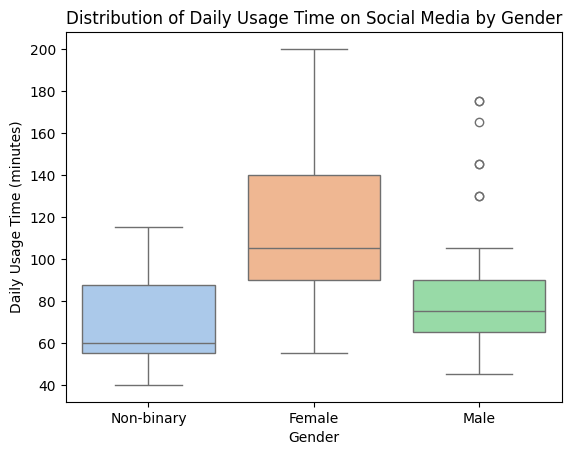

In [18]:
sns.boxplot(x='Gender', y='Daily_time', data= sm_new_clean, hue = 'Gender', palette="pastel") # plot a box plot based on gender and daily usage time.
plt.title('Distribution of Daily Usage Time on Social Media by Gender') # the title
plt.xlabel('Gender') # x-axis label
plt.ylabel('Daily Usage Time (minutes)') # y-axis label
plt.show() # plot it

This box plot visualizes the distribution of daily social media usage time across different gender. For non-binary users, it has a narrow range and the median usage time is around 60 minutes. For female users, it has the widest range and the median usage time for female is also the highest. For male users, it has a narrow range and the median usage time is lower than females, but there are a few outliers with higher usage time.

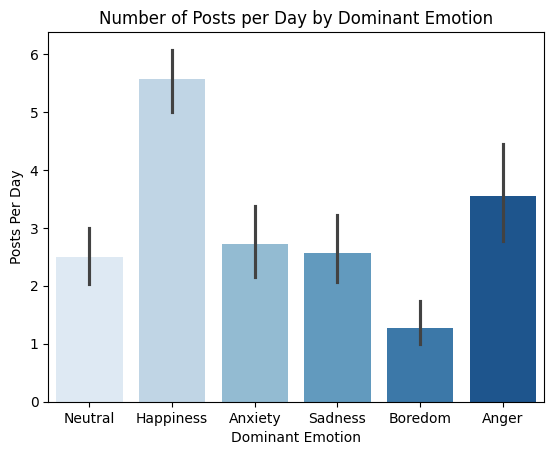

In [19]:
sns.barplot(x='Dominant_Emotion', y='Posts_Per_Day', data= sm_new_clean, hue = 'Dominant_Emotion', palette="Blues") # plot a bar chart of dominant emotion and post per day.
plt.title('Number of Posts per Day by Dominant Emotion') # the title of the bar chart
plt.xlabel('Dominant Emotion') # the label of x-axis
plt.ylabel('Posts Per Day') # the label of y-axis
plt.show() # plot it

This bar chart illustrates the social media posts made per day by users based on the dominant emotion. It shows that users with happiness tend to post the most frequently, around 5-6 posts. Users with anger emotion also post relatively high. Users with boredom emotion tend to post less.

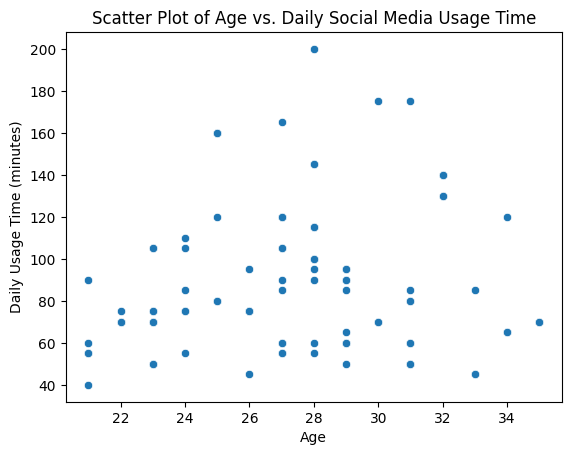

In [20]:
sns.scatterplot(x='Age', y='Daily_time', data= sm_new_clean) # plot a scatter plot of Age and Daily usage time.
plt.title('Scatter Plot of Age vs. Daily Social Media Usage Time') # title
plt.xlabel('Age') # x-axis label
plt.ylabel('Daily Usage Time (minutes)') # y-axis label
plt.show() # plot it

This scatter plot illustrates the relationship between age and daily usage time. The graph shows a wide range of social media engagement. It does not imply any linear relationship, but it shows that around age 26-30, users have a wide variability and the highest usage time can be 200 minutes. Users below 26 or older than 30 tend to have less usage time.

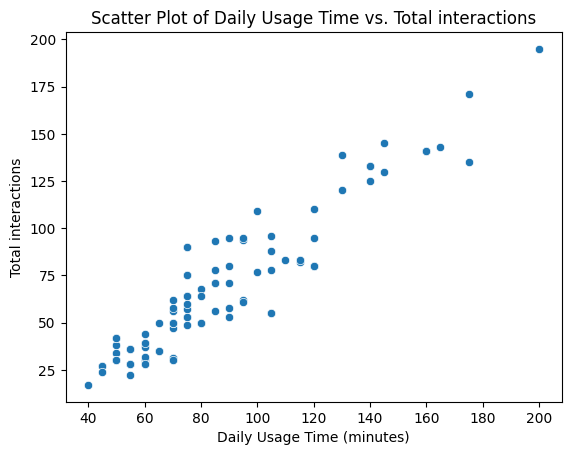

In [21]:
sns.scatterplot(x='Daily_time', y='total_interactions', data= sm_new_clean) # plot a scatter plot with daily usage time and total interactions
plt.title('Scatter Plot of Daily Usage Time vs. Total interactions') # title
plt.xlabel('Daily Usage Time (minutes)') # x-axis label
plt.ylabel('Total interactions') # y-axis label
plt.show() # plot it

This scatter plot illustrates the relationship between daily usage time and total interactions recieved. It shows a positive linear relationship that with more usage time, users tend to get more interactions online.

## 6. Statistical Analysis (ANOVA Test)

**Reference: Statistical_Analysis.ipynb**

My null hypothesis is: The mean daily usage time is the same across all dominant emotion groups.\
My alternative hypothesis is: At least one emotion group has a different mean daily usage time.

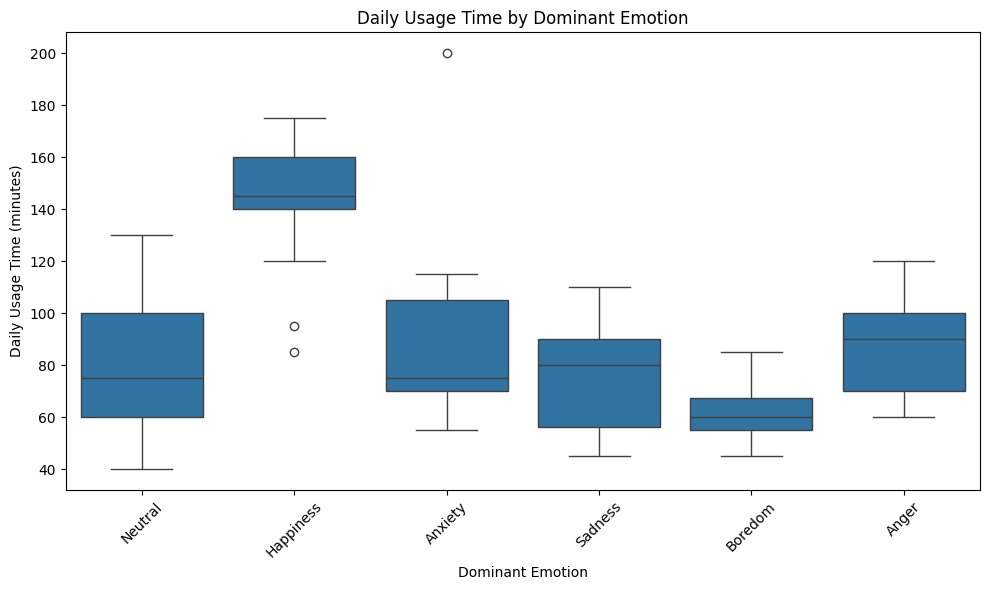

ANOVA Statistic: 17.985671702885412
ANOVA p-value: 1.9262939231333503e-12


In [22]:
import scipy.stats as stats
import statsmodels.api as sm
groups = [sm_new_clean[sm_new_clean['Dominant_Emotion'] == emotion]['Daily_time'] for emotion in sm_new_clean['Dominant_Emotion'].unique()]
anova_stat, anova_p = stats.f_oneway(*groups)

plt.figure(figsize=(10, 6))
sns.boxplot(data=sm_new_clean, x='Dominant_Emotion', y='Daily_time')
plt.title('Daily Usage Time by Dominant Emotion')
plt.ylabel('Daily Usage Time (minutes)')
plt.xlabel('Dominant Emotion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("ANOVA Statistic:", anova_stat)
print("ANOVA p-value:", anova_p)

Since the p vallue is smaller than 0.05, then we need to reject the null hypothesis. Therefore, there is a statistically significant difference in average daily usage time between at least two emotion groups.\
The box plot shows that people with different emotion spend different amounts of time on social media. For example, those experiencing happiness tend to have higher usage times, while people feeling neutural, anxiety, sadness, and anger spend less time. This suggests that daily usage time may be related to users’ emotional response on social media.